In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [2]:
data = pd.read_csv("zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
x = data.iloc[:,1:17].values
x
sc = StandardScaler()
x = sc.fit_transform(x)
x

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [27]:
y_hc

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [28]:
newd = pd.concat([data, pd.DataFrame(y_hc)], axis=1)

In [29]:
newd.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,0
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


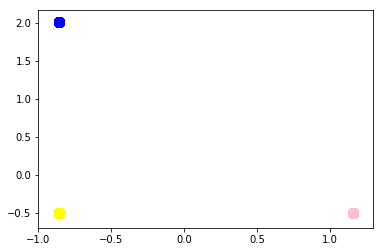

In [30]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='blue', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='pink', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='yellow', label='Cluster3')


In [12]:
data.shape

(101, 18)

In [24]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
